In [1]:
import pandas as pd, numpy as np, time
from sklearn.model_selection import train_test_split

data = pd.read_csv("flights.csv")
data = data.sample(frac = 0.1, random_state=10)

data = data[["MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT","AIR_TIME", "DEPARTURE_TIME","DISTANCE","ARRIVAL_DELAY"]]
data.dropna(inplace=True)

data["ARRIVAL_DELAY"] = (data["ARRIVAL_DELAY"]>10)*1

cols = ["AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT","ORIGIN_AIRPORT"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1
 
train, test, y_train, y_test = train_test_split(data.drop(["ARRIVAL_DELAY"], axis=1), data["ARRIVAL_DELAY"],
                                                random_state=10, test_size=0.25)

G:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
! pip install lightgbm
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

def auc2(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict(train)),
                            metrics.roc_auc_score(y_test,m.predict(test)))

In [3]:
lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(train,y_train)
grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed: 11.1min remaining:   53.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 11.2min finished


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=25,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=1200, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [4]:
d_train = lgb.Dataset(train, label=y_train, free_raw_data=False)
params = {"max_depth": 25, "learning_rate" : 0.05, "num_leaves": 1200,  "n_estimators": 200}

In [5]:
# Without Categorical Features
lgb_without_categorical = lgb.train(params, d_train)
auc2(lgb_without_categorical, train, test)

G:\Programs\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


(0.9354031006819685, 0.7848275183623448)

In [6]:
#With Catgeorical Features
cate_features_name = ["MONTH","DAY","DAY_OF_WEEK","AIRLINE","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT"]
lgb_with_categorical = lgb.train(params, d_train, categorical_feature = cate_features_name)
auc2(lgb_with_categorical, train, test)

G:\Programs\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
G:\Programs\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['AIRLINE', 'DAY', 'DAY_OF_WEEK', 'DESTINATION_AIRPORT', 'MONTH', 'ORIGIN_AIRPORT']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


(0.9852322228955841, 0.7777285267382876)

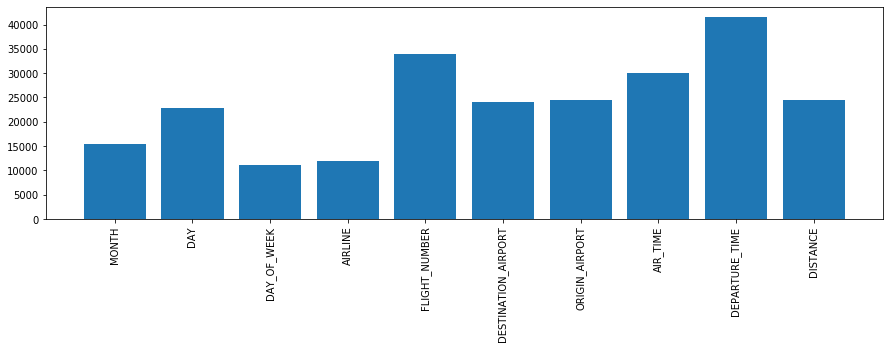

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5))

# With Categorical Features
height = lgb_without_categorical.feature_importance()
bars = lgb_without_categorical.feature_name()
y_pos = np.arange(len(bars_without_categorica))
 
# Create bars
plt.bar(y_pos, height)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
# Show graphic
plt.show()

In [19]:
import pandas as pd, numpy as np, time
from sklearn.model_selection import train_test_split

data = pd.read_csv("flights.csv")
data = data.sample(frac = 0.1, random_state=10)

data = data[["MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT","AIR_TIME", "DEPARTURE_TIME","DISTANCE","ARRIVAL_DELAY"]]
data.dropna(inplace=True)

data["ARRIVAL_DELAY"] = (data["ARRIVAL_DELAY"]>10)*1

cols = ["AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT","ORIGIN_AIRPORT"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1
 
train, test, y_train, y_test = train_test_split(data.drop(["ARRIVAL_DELAY"], axis=1), data["ARRIVAL_DELAY"],
                                                random_state=10, test_size=0.25)

G:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
# ! pip install catboost --no-cache-dir
import catboost as cb
from sklearn.model_selection import GridSearchCV

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

In [21]:
cb = cb.CatBoostClassifier()
param_dist = {'depth': [4, 7, 10],
              'learning_rate' : [0.03, 0.1, 0.15],
              'l2_leaf_reg': [1,4,9],
              'iterations': [300]}
cb_model = GridSearchCV(cb,  n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
cb_model.fit(train, y_train)
cb_model.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed: 21.8min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 22.6min finished


0:	learn: 0.6343475	total: 157ms	remaining: 47.1s
1:	learn: 0.5935207	total: 253ms	remaining: 37.6s
2:	learn: 0.5646820	total: 342ms	remaining: 33.9s
3:	learn: 0.5444226	total: 435ms	remaining: 32.2s
4:	learn: 0.5299909	total: 539ms	remaining: 31.8s
5:	learn: 0.5193669	total: 637ms	remaining: 31.2s
6:	learn: 0.5120606	total: 724ms	remaining: 30.3s
7:	learn: 0.5056049	total: 816ms	remaining: 29.8s
8:	learn: 0.5012633	total: 907ms	remaining: 29.3s
9:	learn: 0.4979327	total: 1s	remaining: 29s
10:	learn: 0.4948679	total: 1.09s	remaining: 28.6s
11:	learn: 0.4923686	total: 1.18s	remaining: 28.3s
12:	learn: 0.4901544	total: 1.27s	remaining: 28.1s
13:	learn: 0.4886077	total: 1.37s	remaining: 27.9s
14:	learn: 0.4875087	total: 1.46s	remaining: 27.7s
15:	learn: 0.4860225	total: 1.55s	remaining: 27.5s
16:	learn: 0.4850561	total: 1.64s	remaining: 27.3s
17:	learn: 0.4840046	total: 1.73s	remaining: 27.1s
18:	learn: 0.4829765	total: 1.82s	remaining: 27s
19:	learn: 0.4821046	total: 1.92s	remaining: 26.

162:	learn: 0.4395152	total: 15.1s	remaining: 12.7s
163:	learn: 0.4393075	total: 15.1s	remaining: 12.6s
164:	learn: 0.4391918	total: 15.2s	remaining: 12.5s
165:	learn: 0.4390232	total: 15.3s	remaining: 12.4s
166:	learn: 0.4388796	total: 15.4s	remaining: 12.3s
167:	learn: 0.4387004	total: 15.5s	remaining: 12.2s
168:	learn: 0.4384628	total: 15.6s	remaining: 12.1s
169:	learn: 0.4383313	total: 15.7s	remaining: 12s
170:	learn: 0.4381037	total: 15.8s	remaining: 11.9s
171:	learn: 0.4379949	total: 15.9s	remaining: 11.8s
172:	learn: 0.4377887	total: 16s	remaining: 11.7s
173:	learn: 0.4376257	total: 16.1s	remaining: 11.6s
174:	learn: 0.4375156	total: 16.2s	remaining: 11.5s
175:	learn: 0.4373833	total: 16.3s	remaining: 11.5s
176:	learn: 0.4372399	total: 16.3s	remaining: 11.4s
177:	learn: 0.4370521	total: 16.4s	remaining: 11.3s
178:	learn: 0.4368748	total: 16.5s	remaining: 11.2s
179:	learn: 0.4367692	total: 16.6s	remaining: 11.1s
180:	learn: 0.4366424	total: 16.7s	remaining: 11s
181:	learn: 0.4364

In [36]:
cb_model.best_estimator_.__dict__

{'_init_params': {'depth': 10,
  'iterations': 300,
  'l2_leaf_reg': 9,
  'learning_rate': 0.15},
 '_object': <_catboost._CatBoost at 0x15ecf053c60>,
 '_random_seed': 0,
 '_learning_rate': 0.15000000596046448,
 '_tree_count': 300,
 '_prediction_values_change': [13.625173237222091,
  8.928120472482538,
  5.7918877729679386,
  9.16428395224229,
  5.768848085221825,
  6.751378879216918,
  8.619663405549899,
  10.784731485369035,
  19.850356516398392,
  10.715556193329075]}

In [38]:
# Without Categorical features
import catboost as cb
clf_without_categorica = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 300, l2_leaf_reg= 9, learning_rate= 0.15,  verbose=20)
clf_without_categorica.fit(train,y_train)
auc(clf_without_categorica, train, test)

0:	total: 110ms	remaining: 33s
20:	total: 2.01s	remaining: 26.8s
40:	total: 3.88s	remaining: 24.5s
60:	total: 5.7s	remaining: 22.3s
80:	total: 7.51s	remaining: 20.3s
100:	total: 9.32s	remaining: 18.4s
120:	total: 11.2s	remaining: 16.5s
140:	total: 13s	remaining: 14.6s
160:	total: 14.9s	remaining: 12.9s
180:	total: 16.8s	remaining: 11.1s
200:	total: 18.7s	remaining: 9.21s
220:	total: 20.6s	remaining: 7.35s
240:	total: 22.5s	remaining: 5.51s
260:	total: 24.4s	remaining: 3.65s
280:	total: 26.3s	remaining: 1.78s
299:	total: 28.1s	remaining: 0us


(0.8013585721760655, 0.7532716812807292)

In [39]:
# With Categorical features
clf_with_categorical = cb.CatBoostClassifier(eval_metric="AUC", one_hot_max_size=31, depth=10, iterations= 300, l2_leaf_reg= 9, learning_rate= 0.15,  verbose=20)
cat_features_index = [0,1,2,3,4,5,6]
clf_with_categorical.fit(train,y_train, cat_features= cat_features_index)
auc(clf_with_categorical, train, test)

0:	total: 420ms	remaining: 2m 5s
20:	total: 7.65s	remaining: 1m 41s
40:	total: 15.1s	remaining: 1m 35s
60:	total: 22.7s	remaining: 1m 28s
80:	total: 30s	remaining: 1m 21s
100:	total: 37.6s	remaining: 1m 14s
120:	total: 45.4s	remaining: 1m 7s
140:	total: 53.4s	remaining: 1m
160:	total: 1m 1s	remaining: 52.9s
180:	total: 1m 8s	remaining: 45.1s
200:	total: 1m 16s	remaining: 37.5s
220:	total: 1m 23s	remaining: 29.9s
240:	total: 1m 31s	remaining: 22.4s
260:	total: 1m 39s	remaining: 14.8s
280:	total: 1m 46s	remaining: 7.21s
299:	total: 1m 53s	remaining: 0us


(0.8651595108218882, 0.8045859964534174)

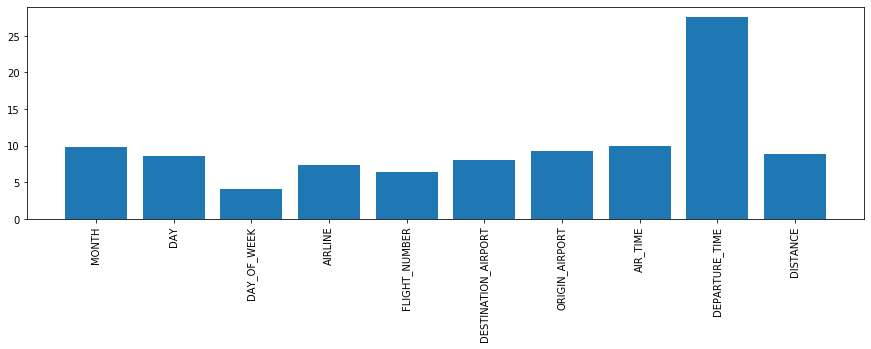

In [51]:
figure(num=None, figsize=(15, 5))

# With Categorical Features
height = clf_with_categorical.get_feature_importance()
bars = clf_with_categorical.feature_names_
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
# Show graphic
plt.show()